In [7]:
import numpy as np
import f90nml
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches


In [8]:
nml    = f90nml.read('par1')
infile = nml['filename_par']['outfilename']
rdim = nml['cal_par']['dim_ra']
tdim = nml['cal_par']['dim_th']
pdim = nml['cal_par']['dim_ph']
thstart = nml['cal_par']['th_start']
phstart = nml['cal_par']['ph_start']
rastart = nml['cal_par']['ra_start']
thend   = nml['cal_par']['th_end']
phend   = nml['cal_par']['ph_end']
raend   = nml['cal_par']['ra_end']
nlevel = nml['cal_par']['nlevel']

rdim = 1
tdim = 713
pdim = 1437

theta_grid=np.linspace(thstart,thend,tdim)
phi_grid=np.linspace(phstart,phend,pdim)

f    = open(infile,'rb')
data = np.fromfile(f, dtype=np.double, count=rdim*tdim*pdim*5)
q    = np.reshape(data,(3,pdim,tdim,rdim))
f.close()

Text(0, 0.5, 'Phi')

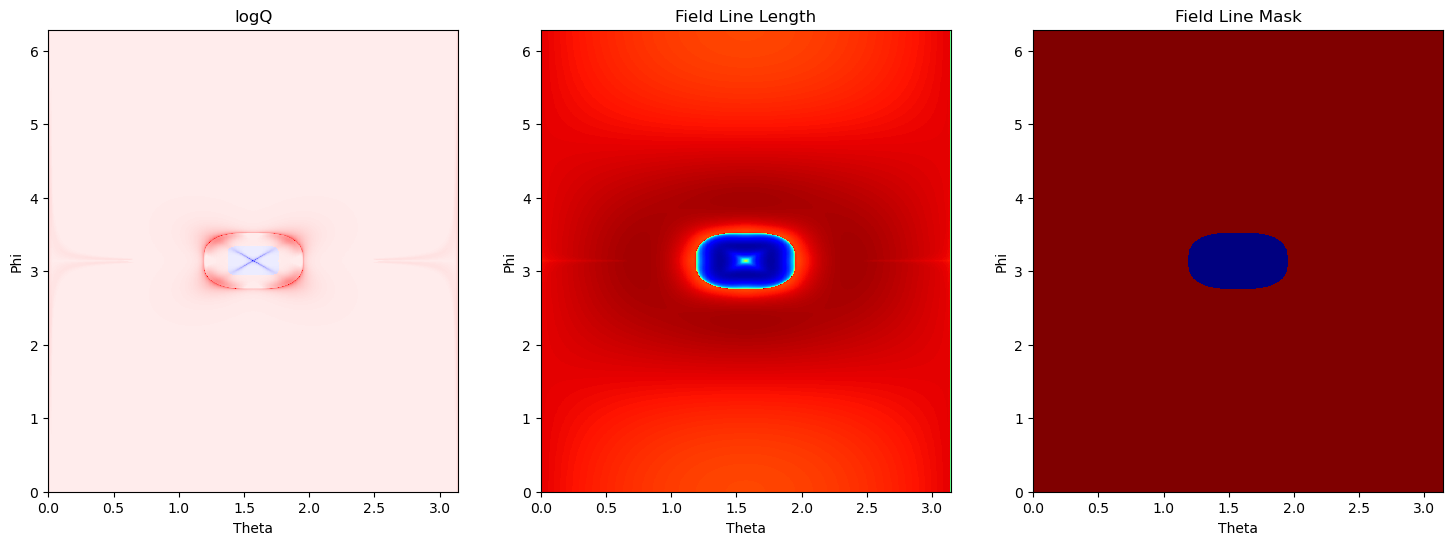

In [20]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.pcolormesh(theta_grid,phi_grid,q[0,:,:,0],vmax=4,vmin=-4,cmap='bwr')
plt.title('logQ')
plt.xlabel('Theta')
plt.ylabel('Phi')

plt.subplot(132)
plt.pcolormesh(theta_grid,phi_grid,q[1,:,:,0],cmap='jet')
plt.title('Field Line Length')
plt.xlabel('Theta')
plt.ylabel('Phi')

plt.subplot(133)
plt.pcolormesh(theta_grid,phi_grid,q[2,:,:,0],cmap='jet')
plt.title('Field Line Mask')
plt.xlabel('Theta')
plt.ylabel('Phi')